# Evaluating Task Performance

## Introduction

All medical images are created for a purpose, to detect, diagnose, quantify, monitor, etc. For this reason, [OIC](https://aapm.onlinelibrary.wiley.com/doi/full/10.1118/1.4881148) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('..')
from utils import calculate_task_improvement
sys.path.append('../..')
from noise_assessments import order_recons

results = pd.read_csv('results.csv')
results

/tmp/ipykernel_2221162/1996923030.py:11: DtypeWarning: Columns (1,4,9,20) have mixed types. Specify dtype option on import or set low_memory=False.
  results = pd.read_csv('results.csv')


,experiment,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,...,RMSE [HU],noise std [HU],rmse reduction [%],noise std reduction [%],observer,contrast [HU],snr,auc,delta auc,pediatric subgroup
0,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.202656,27.290950,36.982130,65.015401,NaN,NaN,NaN,NaN,NaN,newborn
1,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.324512,27.919199,36.775716,64.210042,NaN,NaN,NaN,NaN,NaN,newborn
2,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.225440,24.748623,36.943534,68.274442,NaN,NaN,NaN,NaN,NaN,newborn
3,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.082504,27.282190,37.185656,65.026631,NaN,NaN,NaN,NaN,NaN,newborn
4,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,36.786850,25.111681,37.686467,67.809033,NaN,NaN,NaN,NaN,NaN,newborn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129075,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.455877,0.8480,0.0234,adult
129076,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.252556,0.8214,-0.0032,adult
129077,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.214887,0.8060,-0.0186,adult
129078,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.260605,0.8189,-0.0057,adult


In [2]:
results[results['experiment'] == 'task performance'].shape, results[results['experiment'] == 'noise reduction'].shape

((49280, 26), (79800, 26))

results['experiment'] = 'noise reduction'
results.rename({'effective diameter (cm)': 'effective diameter [cm]', 'age (year)' : 'age [year]', 'weight (kg)':'weight [kg]', 'height (cm)': 'height [cm]', 'rmse':'RMSE [HU]', 'noise std':'noise std [HU]'},axis='columns', inplace=True)
results = pd.concat([results, df])

results


files = []
for idx, row in results[results.experiment == 'task performance'].iterrows():
    new_file = results[(results['phantom'] == row['phantom']) &
                       (results['effective diameter [cm]'] == row['effective diameter [cm]']) & 
                       (results['Dose [%]'] == row['Dose [%]']) &
                       (results['recon'] == row['recon']) &
                       (results['sim number'] == row['sim number']) &
                       (results['experiment'] == 'noise reduction')].file.item()
    files.append(new_file)
results.loc[results.experiment == 'task performance', 'file'] = files

In [3]:
recon_order = order_recons(results.recon.unique())

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

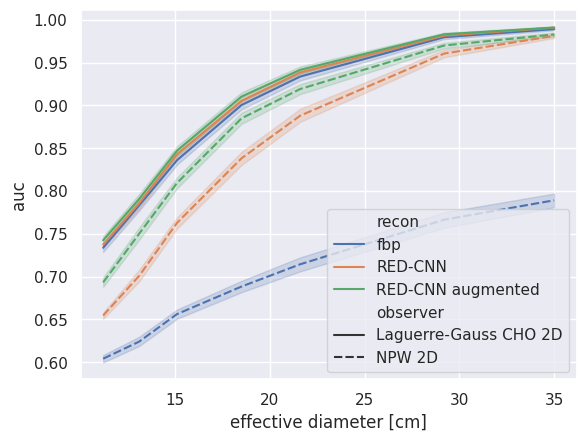

In [4]:
sns.lineplot(data=results[results['effective diameter [cm]']!=20],
             x='effective diameter [cm]',
             y='auc',
             hue='recon',
             style='observer',
             hue_order=recon_order)

In [5]:
if 'delta auc' not in results:
    results['delta auc'] = calculate_task_improvement(results)['delta auc']

## LG CHO

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

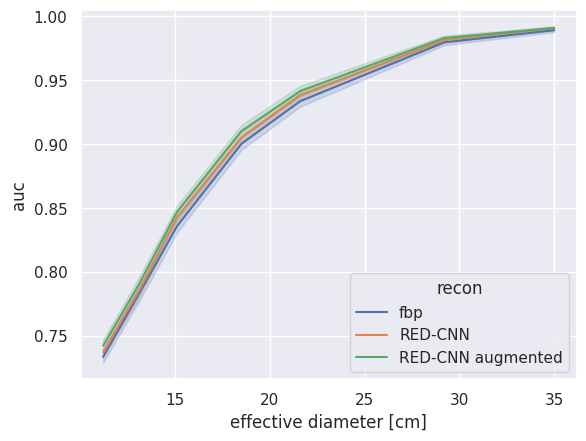

In [6]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=200)],
                            x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

<Axes: xlabel='effective diameter [cm]', ylabel='auc'>

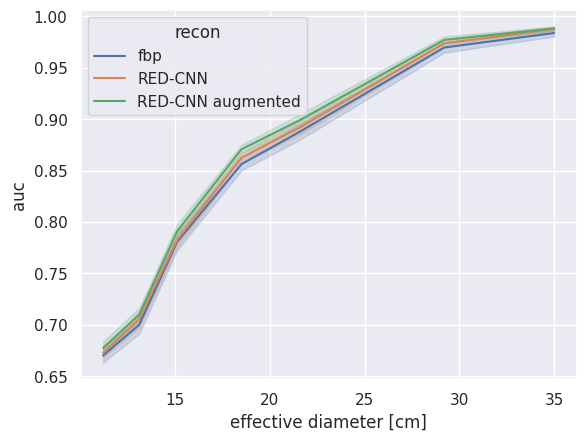

In [7]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                          (results['effective diameter [cm]']!=200) &
                          (results['Dose [%]']==25)], x='effective diameter [cm]', y='auc', hue='recon', hue_order=recon_order)

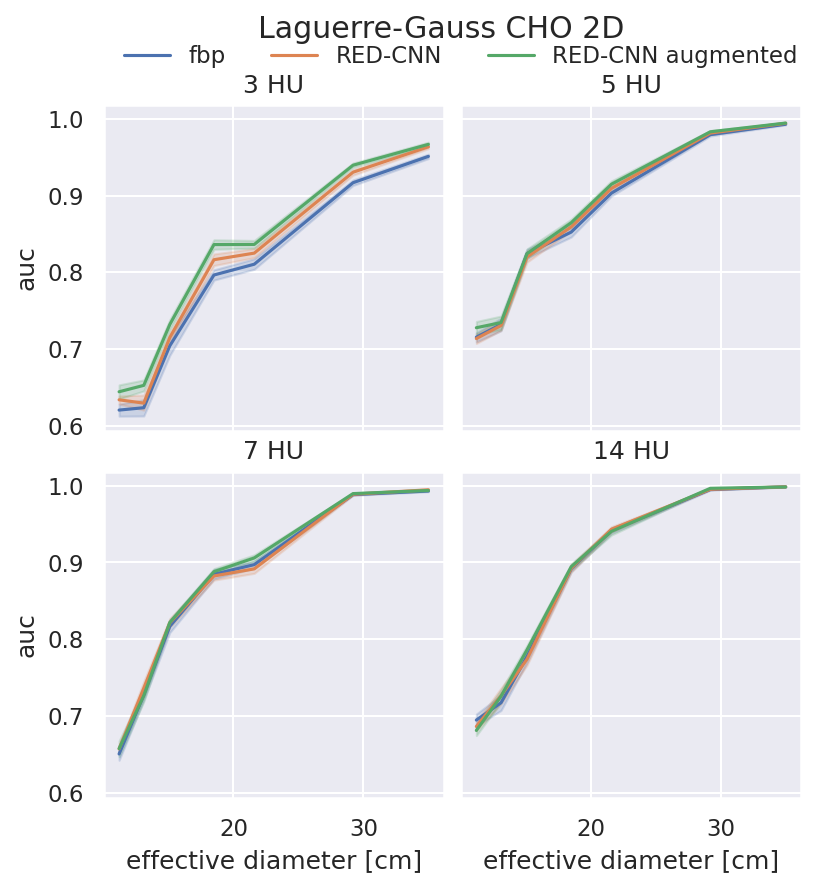

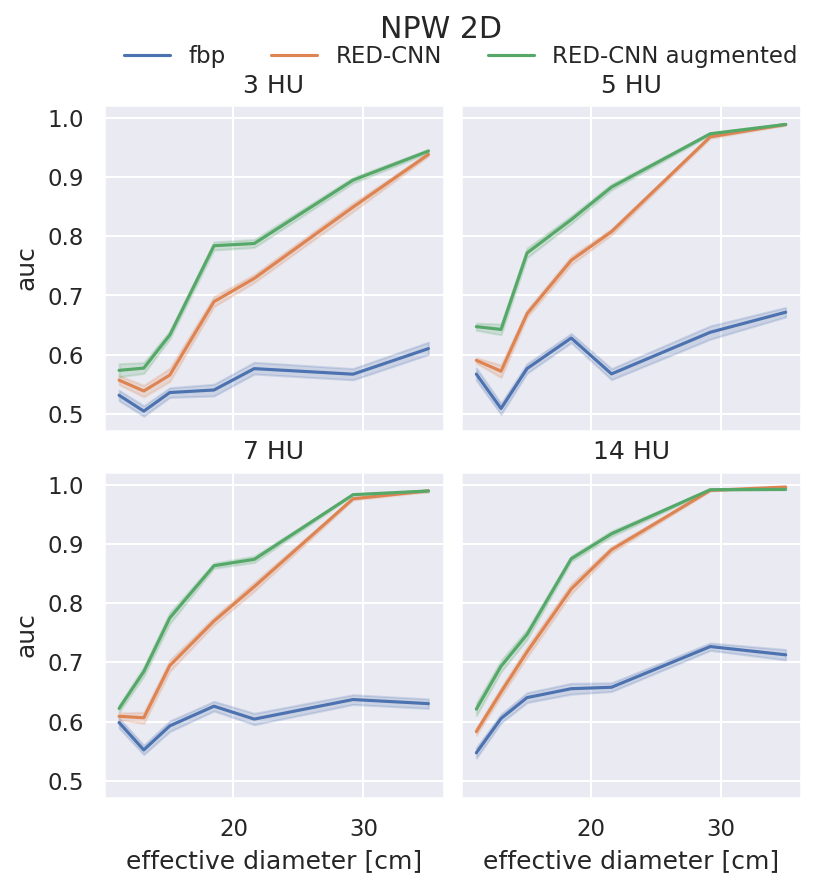

In [8]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, dpi=150, figsize=(6,6), sharex=True, sharey=True, gridspec_kw=dict(wspace=0.05, hspace=0.125))
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.lineplot(data=results[(results['observer']==f'{observer}') &
                                  (results['effective diameter [cm]']!=200) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu)], 
                     x='effective diameter [cm]',
                     y='auc',
                     hue='recon',
                     hue_order=recon_order, ax=axs[idx], legend=legend)
        axs[idx].set_title(f'{hu} HU')
    f.suptitle(f'{observer}')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.05, 1.05), ncol=3, frameon=False, title=None,
    )
    f.savefig(f'{observer}.png', dpi=600)

**Nirmal's comment: add some example images from **

In [9]:
results.iloc[results['delta auc'].argmax()]

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        35.0 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 35.0
Dose [%]                                                                  40
recon                                                                RED-CNN

In [10]:
# results.iloc[results.recon=='RED-CNN augmented']['delta auc'].argmax()]

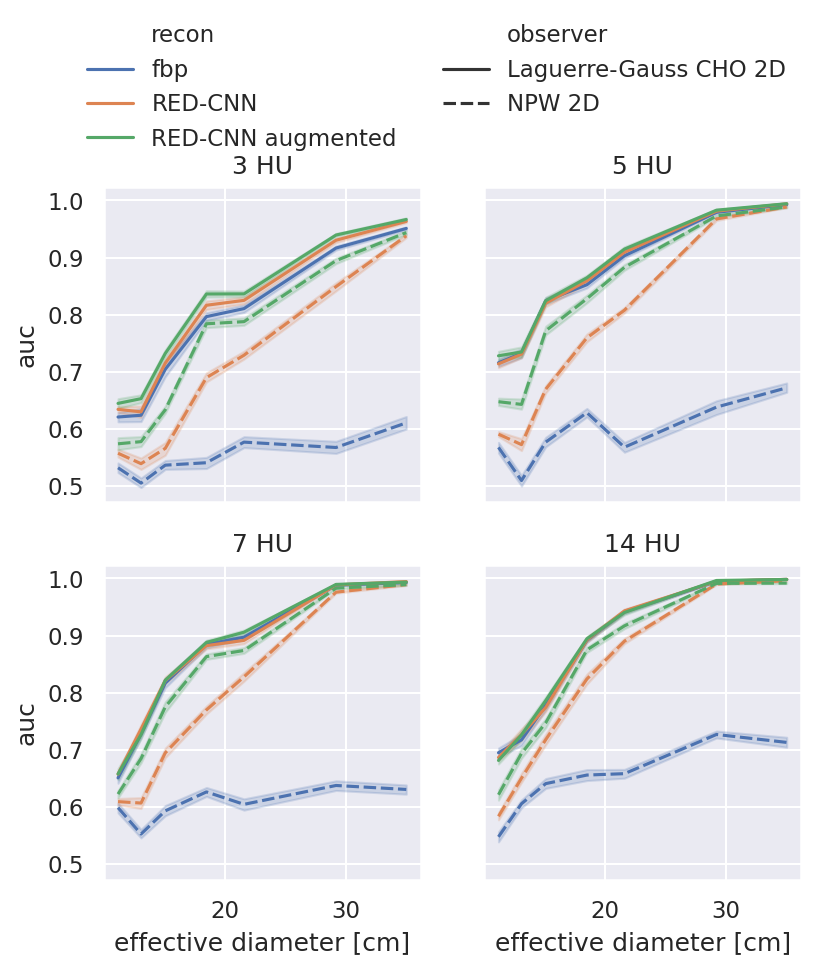

In [11]:
f, axs = plt.subplots(2,2, figsize=(6,6), dpi=150, sharex=True, sharey=True)
axs = axs.flatten()
for idx, hu in enumerate([3, 5, 7, 14]):
    legend = True if idx < 1 else False
    sns.lineplot(data=results[(results['effective diameter [cm]']!=200) &
                              (results['Dose [%]']==25) &
                              (results['contrast [HU]'] == hu)], 
                 x='effective diameter [cm]',
                 y='auc',
                 hue='recon',
                 hue_order=recon_order, ax=axs[idx], style='observer', legend=legend)
    axs[idx].set_title(f'{hu} HU')
sns.move_legend(
    axs[0], "lower center",
    bbox_to_anchor=(1.05, 1.05), ncol=2, frameon=False, title=None,
)
f.savefig(f'task_performance.png', dpi=600, bbox_inches='tight')

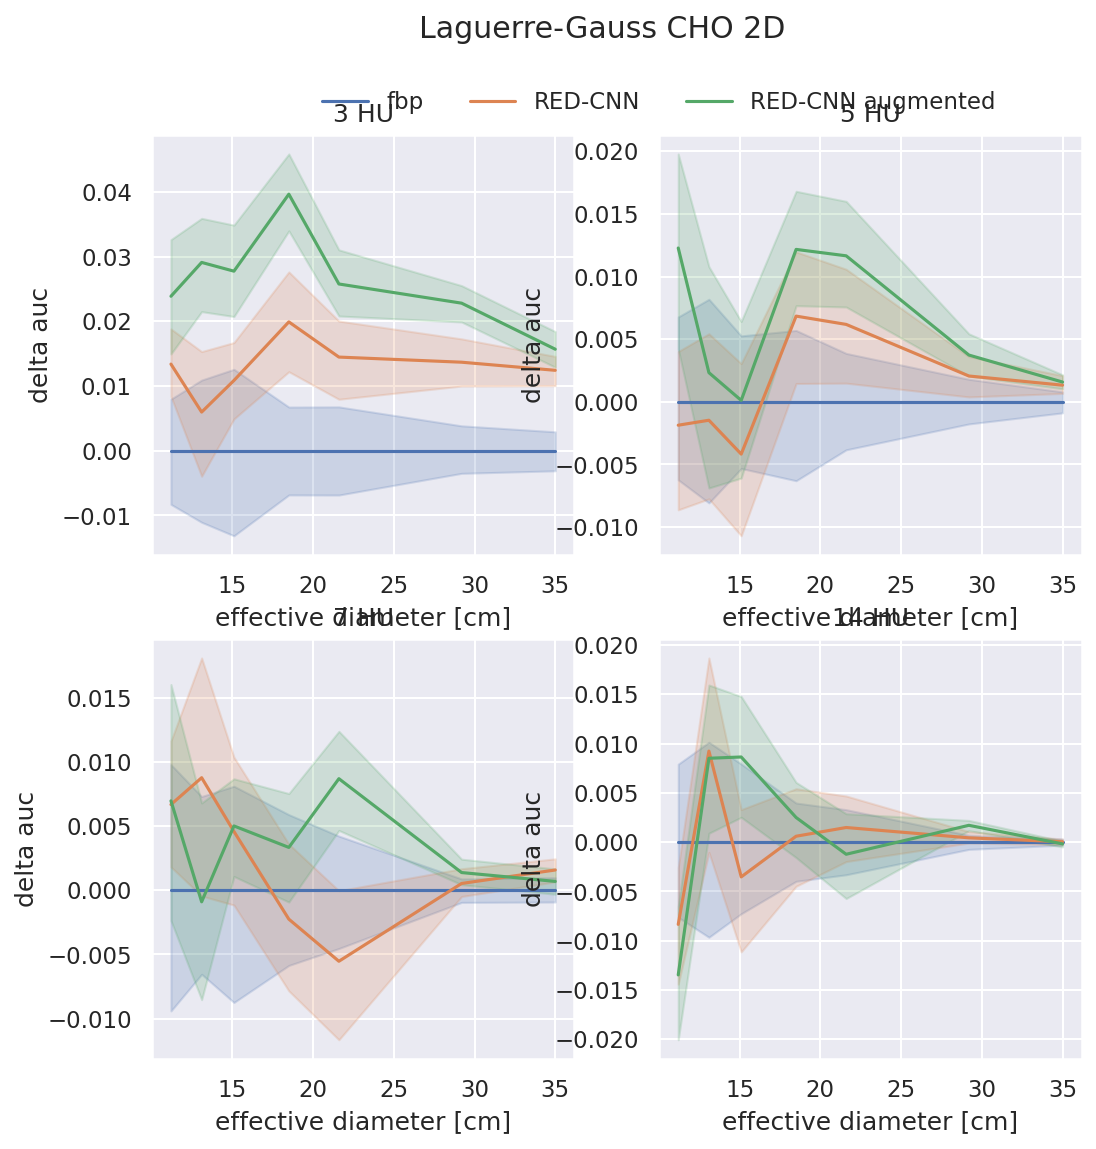

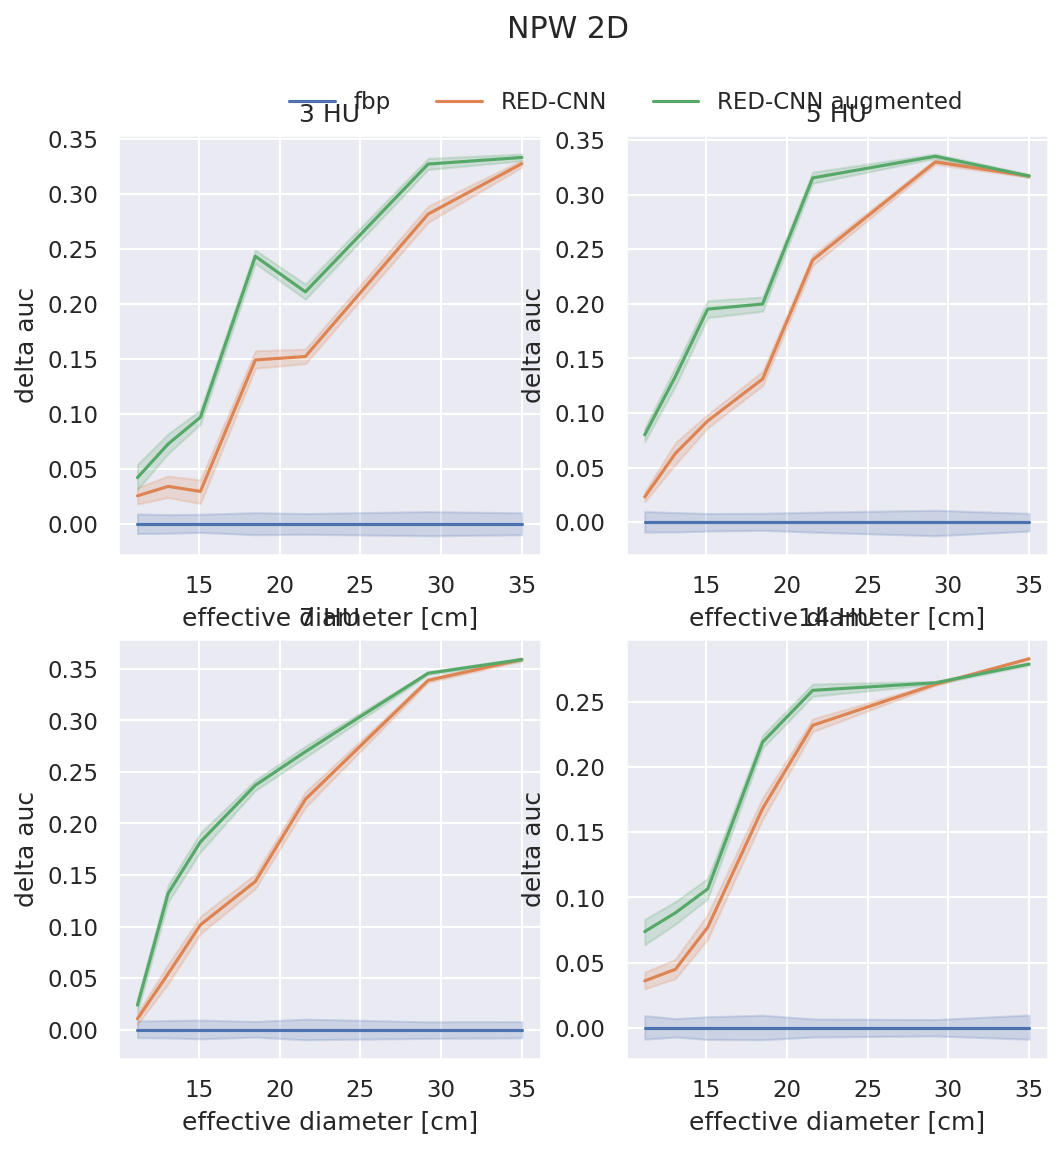

In [12]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, figsize=(8,8), dpi=150)
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.lineplot(data=results[(results['observer']==f'{observer}') &
                                  (results['effective diameter [cm]']!=200) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu)], 
                     x='effective diameter [cm]',
                     y='delta auc',
                     hue='recon',
                     hue_order=recon_order, ax=axs[idx], legend=legend)
        axs[idx].set_title(f'{hu} HU')
    f.suptitle(f'{observer}')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.2, 1), ncol=3, frameon=False, title=None,
    )
    f.show()

In [14]:
def age_to_eff_diameter(age):
    # https://www.aapm.org/pubs/reports/rpt_204.pdf
    x = age
    a = 18.788598
    b = 0.19486455
    c = -1.060056
    d = -7.6244784
    y = a + b*x**1.5 + c *x**0.5 + d*np.exp(-x)
    eff_diam = y
    return eff_diam

adult_waist_circumferences_cm = {
    # 20: 90.7,
    30: 99.9,
    40: 102.8,
    # 50: 103.3,
    60: 106.2,
    70: 106.6,
    80: 104.1
}

def diameter_range_from_subgroup(subgroup):
    if subgroup == 'newborn': return (0, age_to_eff_diameter(1/12))
    elif subgroup == 'infant': return (age_to_eff_diameter(1/12), age_to_eff_diameter(2))
    elif subgroup == 'child': return (age_to_eff_diameter(2), age_to_eff_diameter(12))
    elif subgroup == 'adolescent': return (age_to_eff_diameter(12), age_to_eff_diameter(22))
    else: return (age_to_eff_diameter(22), 100)

def pediatric_subgroup(diameter):
    if diameter < age_to_eff_diameter(1):
        return 'newborn'
    elif (diameter >= age_to_eff_diameter(1)) & (diameter < age_to_eff_diameter(5)):
        return 'infant'
    elif (diameter >= age_to_eff_diameter(5)) & (diameter < age_to_eff_diameter(12)):
        return 'child'
    elif (diameter >= age_to_eff_diameter(12)) & (diameter < age_to_eff_diameter(22)):
        return 'adolescent'
    else:
        return 'adult'

In [15]:
results['pediatric subgroup'] = results['effective diameter [cm]'].apply(pediatric_subgroup)
results

,experiment,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,...,RMSE [HU],noise std [HU],rmse reduction [%],noise std reduction [%],observer,contrast [HU],snr,auc,delta auc,pediatric subgroup
0,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.202656,27.290950,36.982130,65.015401,NaN,NaN,NaN,NaN,NaN,newborn
1,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.324512,27.919199,36.775716,64.210042,NaN,NaN,NaN,NaN,NaN,newborn
2,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.225440,24.748623,36.943534,68.274442,NaN,NaN,NaN,NaN,NaN,newborn
3,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,37.082504,27.282190,37.185656,65.026631,NaN,NaN,NaN,NaN,NaN,newborn
4,noise reduction,Reference newborn,male infant,0.166,M,3.8,52.0,14.1,36.0,NaN,...,36.786850,25.111681,37.686467,67.809033,NaN,NaN,NaN,NaN,NaN,newborn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129075,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.455877,0.8480,0.0234,adult
129076,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.252556,0.8214,-0.0032,adult
129077,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.214887,0.8060,-0.0186,adult
129078,task performance,NaN,35.0 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NPW 2D,3.0,1.260605,0.8189,-0.0057,adult


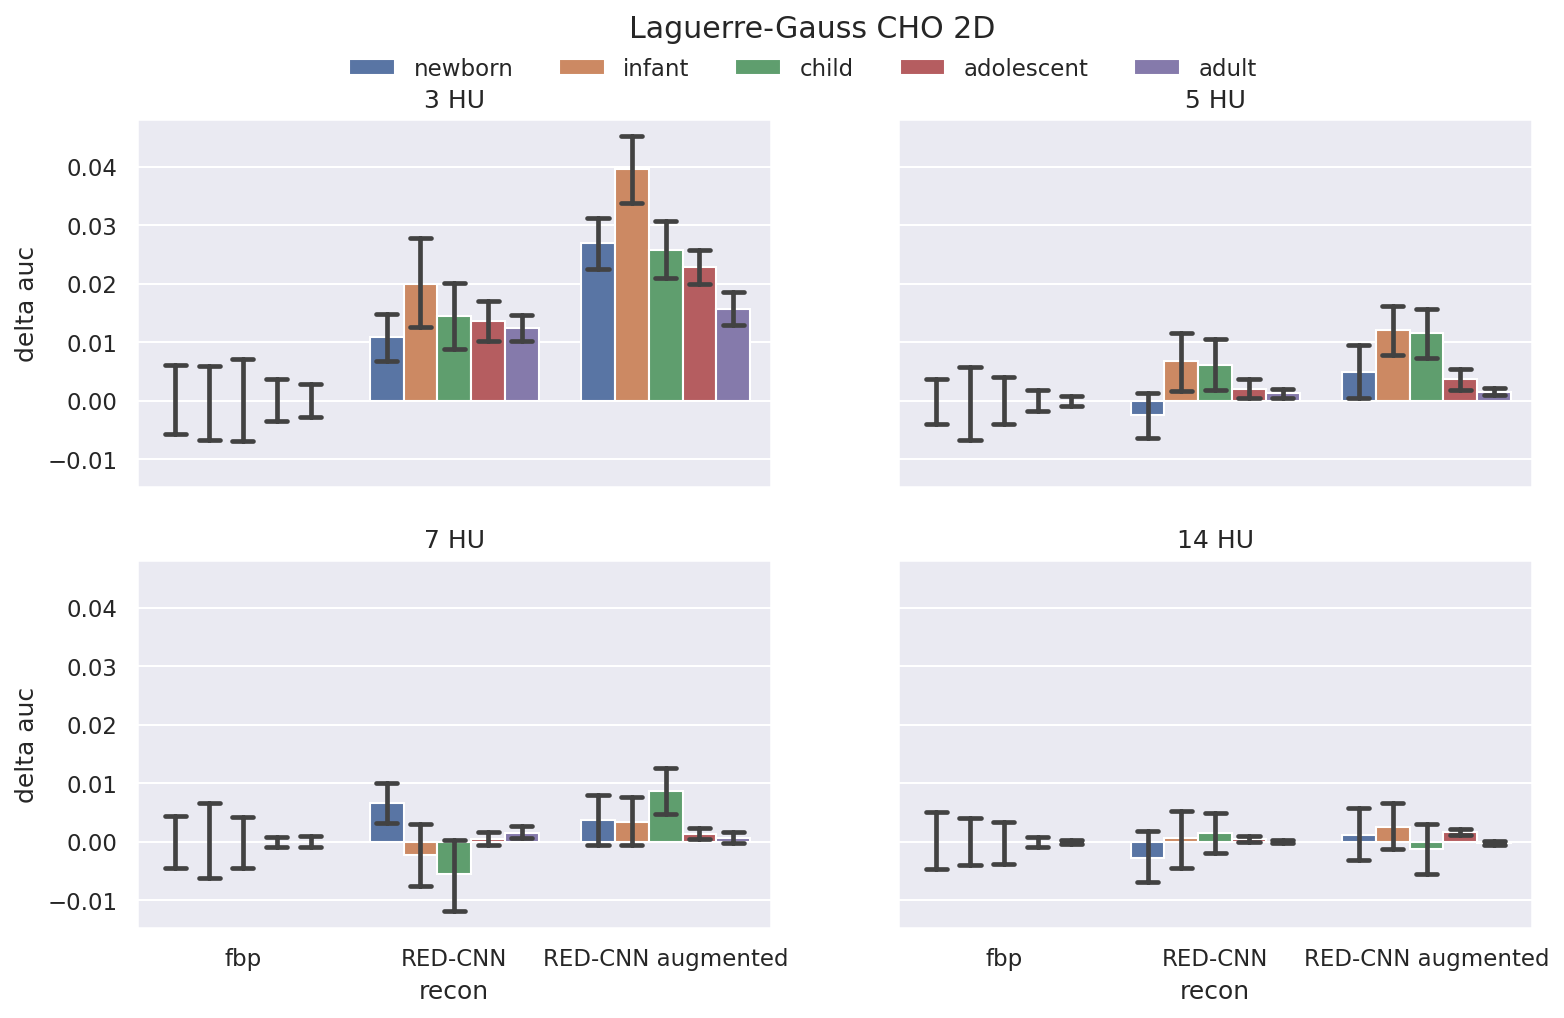

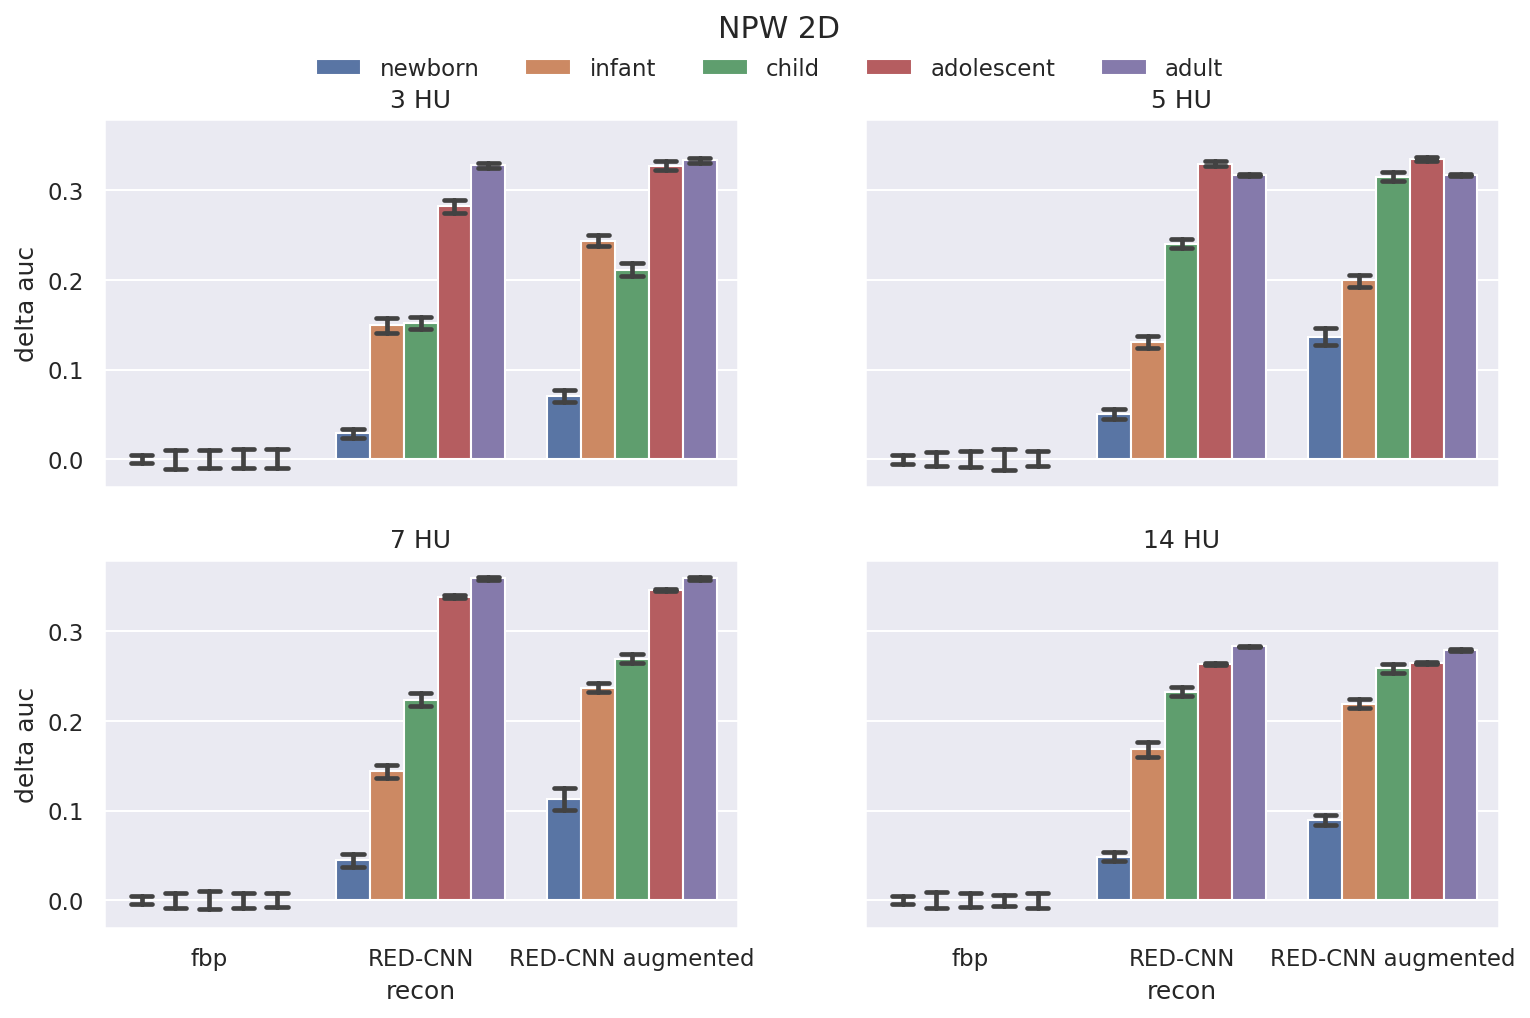

In [16]:
for observer in [o for o in results.observer.unique() if isinstance(o, str)]:
    f, axs = plt.subplots(2,2, figsize=(12,7), dpi=150, sharex=True, sharey=True)
    axs = axs.flatten()
    for idx, hu in enumerate([3, 5, 7, 14]):
        legend = True if idx < 1 else False
        sns.barplot(data=results[(results['effective diameter [cm]']!=200) &
                                  (results['Dose [%]']==25) &
                                  (results['contrast [HU]'] == hu) &
                                  (results['observer'] == observer)], 
                     x='recon',
                     y='delta auc',
                     order = recon_order,
                     hue='pediatric subgroup',
                     ax=axs[idx], legend=legend, capsize=0.5)
        axs[idx].set_title(f'{hu} HU')
    sns.move_legend(
        axs[0], "lower center",
        bbox_to_anchor=(1.05, 1.05), ncols=5, title=None, frameon=False,
    )
    f.suptitle(observer)
    plt.savefig(f'subgroup_task_performance_{observer}.png', dpi=600, bbox_inches='tight')

In [17]:
results[results.observer == 'Laguerre-Gauss CHO 2D'].sort_values(by='delta auc', ascending=False)

,experiment,Code #,Name,age [year],gender,weight [kg],height [cm],BMI,weight percentile,ethnicity,...,RMSE [HU],noise std [HU],rmse reduction [%],noise std reduction [%],observer,contrast [HU],snr,auc,delta auc,pediatric subgroup
121275,task performance,NaN,15.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,3.0,0.745582,0.7120,0.107012,newborn
105598,task performance,NaN,11.2 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,3.0,0.819859,0.7238,0.106942,newborn
94939,task performance,NaN,13.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,7.0,0.744554,0.6991,0.101895,newborn
82619,task performance,NaN,13.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,7.0,0.744554,0.6991,0.101895,newborn
119001,task performance,NaN,13.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,14.0,0.815511,0.7243,0.093867,newborn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81676,task performance,NaN,11.2 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,3.0,0.341935,0.5952,-0.085227,newborn
109489,task performance,NaN,15.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,14.0,0.301697,0.6024,-0.087220,newborn
84911,task performance,NaN,15.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,3.0,0.427972,0.6091,-0.095050,newborn
97231,task performance,NaN,15.1 cm MITA-LCD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Laguerre-Gauss CHO 2D,3.0,0.427972,0.6091,-0.095050,newborn


In [18]:
results[results.observer == 'NPW 2D'].sort_values(by='delta auc', ascending=False).iloc[0]

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        35.0 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 35.0
Dose [%]                                                                  40
recon                                                                RED-CNN

In [19]:
from utils import load_mhd, ctshow

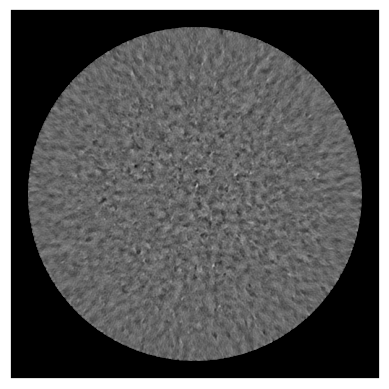

In [20]:
f= results[results.observer == 'Laguerre-Gauss CHO 2D'].sort_values(by='delta auc', ascending=False).file.iloc[0]
vol = load_mhd(f)
ctshow(vol[0])

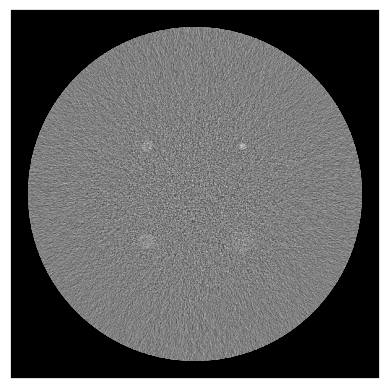

In [21]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
vol = load_mhd(results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35) & (results['phantom'] == 'MITA-LCD') & (results['recon']==recon)].iloc[0].file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

## Most improved according to LG

In [22]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='fbp') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

0.7964425

In [23]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

0.8163474999999998

In [24]:
results[(results['Dose [%]']==25) & (results['pediatric subgroup']=='infant') & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN augmented') & (results['contrast [HU]'] == 3 ) & (results['observer'] == 'Laguerre-Gauss CHO 2D')]['auc'].mean()

0.8360875

In [25]:
results[results['pediatric subgroup'] == 'infant']['effective diameter [cm]'].unique()

array([16. , 15.4, 16.2, 16.9, 17.5, 17.9, 16.3, 18.4, 18.5])

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        18.5 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 18.5
Dose [%]                                                                  25
recon                                                                    fbp

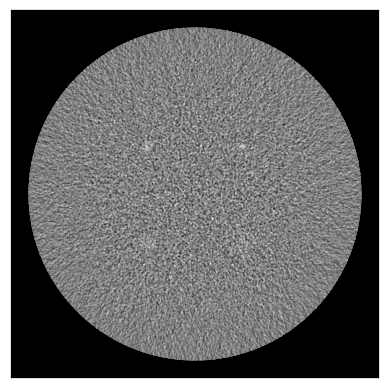

In [26]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3) & (results['observer'] == 'Laguerre-Gauss CHO 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        18.5 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 18.5
Dose [%]                                                                  25
recon                                                                RED-CNN

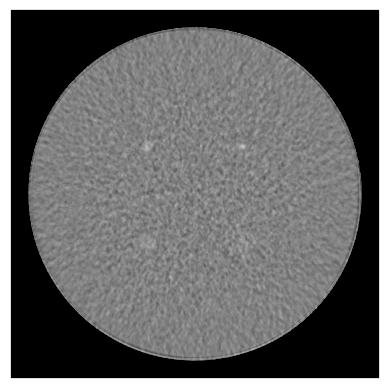

In [27]:
recon = 'RED-CNN'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3)].iloc[0]
print(study)
vol = load_mhd(study.file) - offset  - 5
ctshow(vol[:20].mean(axis=0), window=(80, 0))

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        18.5 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 18.5
Dose [%]                                                                  25
recon                                                      RED-CNN augmented

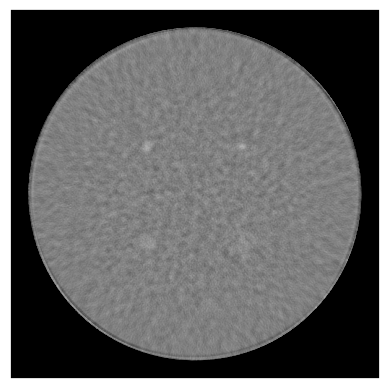

In [28]:
recon = 'RED-CNN augmented'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==18.5) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 3)].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:20].mean(axis=0), window=(80, 0))

## most improved according to NPW

In [29]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='fbp') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

0.63025

In [30]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

0.9894124999999999

In [31]:
results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']=='RED-CNN augmented') & (results['contrast [HU]'] == 7 ) & (results['observer'] == 'NPW 2D')]['auc'].mean()

0.9892949999999999

In [32]:
results[results.observer == 'Laguerre-Gauss CHO 2D'].iloc[results[results.observer == 'Laguerre-Gauss CHO 2D']['delta auc'].argmax()]

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        15.1 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 15.1
Dose [%]                                                                  10
recon                                                      RED-CNN augmented

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        35.0 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 35.0
Dose [%]                                                                  25
recon                                                                    fbp

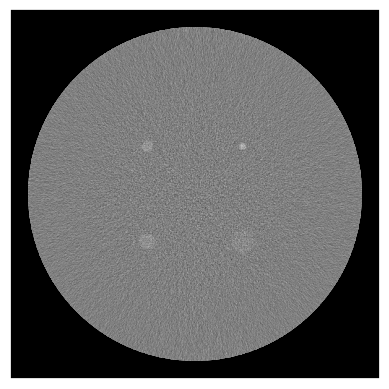

In [33]:
recon = 'fbp'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7) & (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:50].mean(axis=0), window=(80, 0))

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        35.0 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 35.0
Dose [%]                                                                  25
recon                                                                RED-CNN

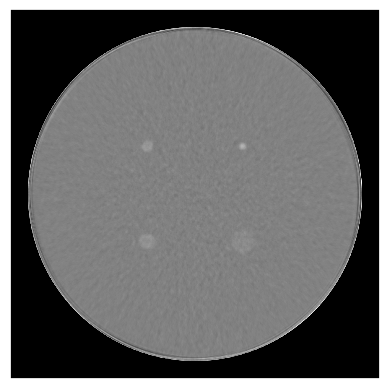

In [34]:
recon = 'RED-CNN'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7) & (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset  - 5
ctshow(vol[:50].mean(axis=0), window=(80, 0))

experiment                                                  task performance
Code #                                                                   NaN
Name                                                        35.0 cm MITA-LCD
age [year]                                                               NaN
gender                                                                   NaN
weight [kg]                                                              NaN
height [cm]                                                              NaN
BMI                                                                      NaN
weight percentile                                                        NaN
ethnicity                                                                NaN
effective diameter [cm]                                                 35.0
Dose [%]                                                                  25
recon                                                      RED-CNN augmented

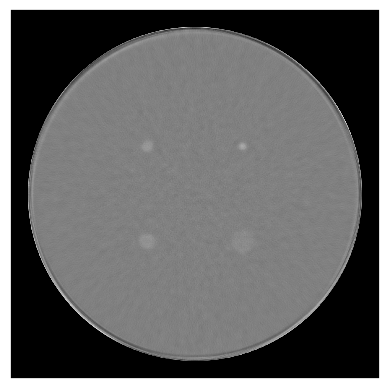

In [35]:
recon = 'RED-CNN augmented'
offset = 1000 if recon == 'fbp' else 0
study = results[(results['Dose [%]']==25) & (results['effective diameter [cm]']==35.0) & (results['experiment'] == 'task performance') & (results['recon']==recon) & (results['contrast [HU]'] == 7)& (results['observer'] == 'NPW 2D')].iloc[0]
print(study)
vol = load_mhd(study.file) - offset
ctshow(vol[:50].mean(axis=0), window=(80, 0))

In [36]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                     (results['diameter']!=200) &
                     (results['dose_level']==25)], x='diameter', y='delta auc', hue='recon')

KeyError: 'diameter'

In [ ]:
sns.lineplot(data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                     (results['diameter']!=200)], x='diameter', y='delta auc', style='recon', hue='insert_HU')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                         (results['diameter']!=200) &
                         (results['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=results[(results['observer']=='Laguerre-Gauss CHO 2D') &
                         (results['diameter']!=200) &
                         (results['dose_level']==25)&       
                         (results['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, results.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                         (df['diameter']!=200) &
                         (df['dose_level']==100)&       
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

Looks like denoising only helps with the really low contrast and larger lesions

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu)], x='diameter', y='delta auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==25) ], x='diameter', y='auc', hue='recon', style='observer')

In [ ]:
f, axs = plt.subplots(2,2, figsize=(8,8), sharex=True, sharey=True)
axs = axs.flatten()
for ax, hu in zip(axs, df.insert_HU.unique()):
    ax.set_title(f'{hu} HU insert')
    sns.lineplot(ax=ax, data=df[(df['diameter']!=200) &
                         (df['insert_HU'] == hu) &
                         (df['dose_level']==100) ], x='diameter', y='auc', hue='recon', style='observer')

In [ ]:
sns.lineplot(data=df[(df['observer']=='Laguerre-Gauss CHO 2D') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')

## NPW

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='recon')

In [ ]:
sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200) &
                     (df['dose_level'] == 25)], x='diameter', y='delta auc', hue='recon')

In [ ]:
f = sns.lineplot(data=df[(df['observer']=='NPW 2D               ') &
                     (df['diameter']!=200)], x='diameter', y='delta auc', hue='dose_level', style='recon')
sns.move_legend(
    f, "lower center",
    bbox_to_anchor=(0.5, 1), ncol=2, frameon=False
)

In [ ]:
def calculate_task_improvement(results, measure='auc'):
    means = df.groupby(['effective diameter [cm]', 'recon', 'contrast [HU]', 'Dose [%]', 'observer'])['auc'].mean()
    noise_reductions = []
    for idx, row in results[results['experiment'] == 'task performance'].iterrows():
        fbp_noise = means[row['effective diameter [cm]'], 'fbp',row['contrast [HU]'], row['Dose [%]'], row['observer']]
        noise_reductions.append(row[measure] - fbp_noise)
    results.loc[results['experiment'] == 'task performance', f'delta {measure}'] = noise_reductions
    return results